In [1]:
%matplotlib inline
import numpy as np
import cv2
from PIL import ImageFont, ImageDraw, Image
import matplotlib.pyplot as plt

In [2]:
cap = cv2.VideoCapture(0)
cap2 = cv2.VideoCapture(2)
cap3 = cv2.VideoCapture(4)
cap4 = cv2.VideoCapture(6)

a, test = cap.read()

selection = 0

w_size = test.shape[1]
h_size = test.shape[0]

img_size = [w_size, h_size]

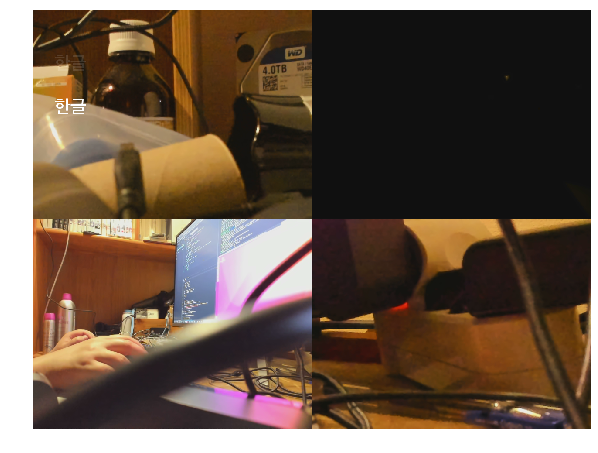

In [4]:
# Capture frame-by-frame
ret, frame = cap.read()
ret2, frame2 = cap2.read()
ret3, frame3 = cap3.read()
ret4, frame4 = cap4.read()

# Merge
vis1 = np.concatenate((frame, frame2), axis=1)
vis2 = np.concatenate((frame3, frame4), axis=1)
vis = np.concatenate((vis1,vis2), axis=0)


vis_pil = cv2.cvtColor(vis, cv2.COLOR_BGR2RGB)
vis_pil = Image.fromarray(vis_pil).convert('RGBA')


# text
text = "한글"
x=50
h=100

txt = Image.new('RGBA', (vis.shape[1], vis.shape[0]), (255, 255, 255, 0))

fontpath = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
font = ImageFont.truetype(fontpath, 40)
img_pil = Image.fromarray(vis).convert('RGBA')

d = ImageDraw.Draw(txt)
d.text((x,h), text, font=font, fill=(255,255,255,30))
d.text((x,h+100), text, font=font, fill=(255,255,255,255))

out = Image.alpha_composite(vis_pil, txt)

draw = ImageDraw.Draw(img_pil)
draw.text((x, h), text, font=font, fill=(255, 255, 255, 0))
img = np.array(img_pil)
#cv2.putText(vis, text, (x, h), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), lineType=cv2.LINE_AA)

plt.figure(figsize=(10,10))
plt.axis("off")
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(out)

In [5]:
# When everything done, release the capture
cap.release()
cap2.release()
cap3.release()
cap4.release()